# Finch Carr - Lab 07
## Event Selection Optimization
- I am supposed to pick either high or low pT samples, and in that sample, there are dedicated training samples for event selection optimization. 
### Problem 1
- I want to make a stacked histogram plot for the mass variable of my data and then compare $\frac{N_{higgs}}{\sqrt{N_{QCD}}}$ ***without event selection***
  - If the factors above are equivalent, I want to then explain why they are equivalent

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle as pk
import h5py
%matplotlib inline

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
pickle_higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
higgs = pk.load(pickle_higgs)
print(higgs.ndim, higgs.size)
higgs

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [3]:
pickle_qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
qcd = pk.load(pickle_qcd)
print(qcd.ndim, qcd.size)
qcd

2 1400000


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


#### Variables
- Each dataset (Higgs and QCD) have 14 features: $p_T$, $\eta$ (eta), $\phi$ (phi), 'mass', $e_2$, $e_3$, $D_2$, 'angularity', $\tau_1$, $\tau_2$, $\tau_3$, $\tau_{21}$, $\tau_{32}$, $Kt\Delta R$
- $p_T$ - Transverse Momentum
   - According to the papers provided, all simulated datapoints require a minimum $p_T$ value of 250 GeV to be counted as a possible signal; our entire QCD and Higgs sets of points have minimum $p_T$ measurements of this value or greater
- $\eta$ (eta) - Psudorapidity
  - For true Higgs boson detections, the papers describe that when the minimum $p_T$ value is set to 250 GeV, the maximum value for $\left|\eta\right|$ is less than or equal to 2.0
- $\phi$ (phi) - Azimuthal Angle
- mass - Transverse Invariant Mass
- Energy Corelation Functions (ECF)
  - $e_2$ **-   2-point ECF**
  - $e_3$ **-   3-point ECF**
  - $D_2$ **-   ratio of ee2 and ee3** 
- Angularity
- $\tau_1$, $\tau_2$, $\tau_3$, $\tau_{21}$, $\tau_{32}$ are N-subjettyness
- $Kt\Delta R$ is the $\Delta R$ value of two subjets within the large-R jet

In [4]:
#Define Higgs variables
hMass = higgs['mass']
hPt = higgs['pt']
hEta = higgs['eta']
hPhi = higgs['phi']
hEe2 = higgs['ee2']
hEe3 = higgs['ee3']
hD2 = higgs['d2']
hAngularity = higgs['angularity']
hT1 = higgs['t1']
hT2 = higgs['t2']
hT3 = higgs['t3']
hT21 = higgs['t21']
hT32 = higgs['t32']
hKtDeltaR = higgs['KtDeltaR']

# Do the same for QCD background
qMass = qcd['mass']
qPt = qcd['pt']
qEta = qcd['eta']
qPhi = qcd['phi']
qEe2 = qcd['ee2']
qEe3 = qcd['ee3']
qD2 = qcd['d2']
qAngularity = qcd['angularity']
qT1 = qcd['t1']
qT2 = qcd['t2']
qT3 = qcd['t3']
qT21 = qcd['t21']
qT32 = qcd['t32']
qKtDeltaR = qcd['KtDeltaR']

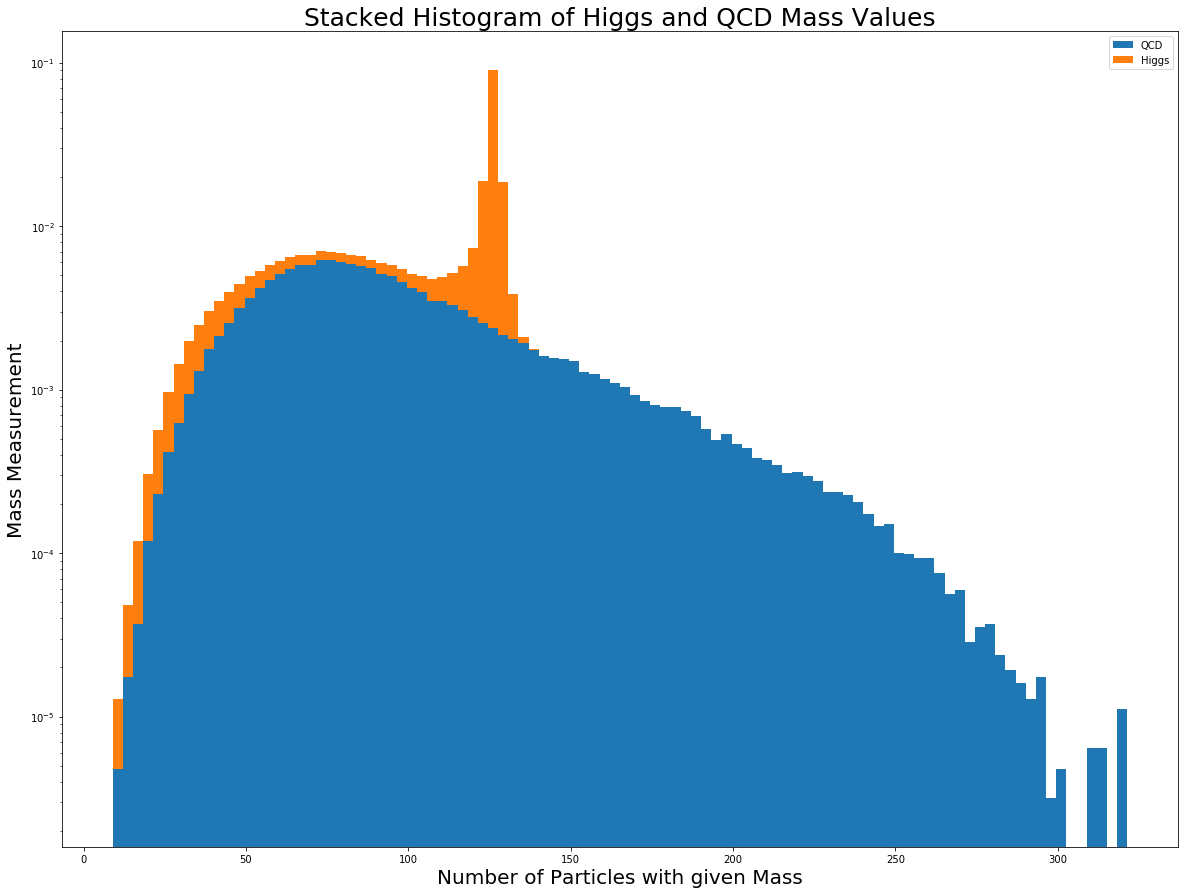

In [5]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')
n_bins = 100
ax.hist((qMass, hMass), bins=n_bins, density=True, histtype='bar', stacked=True, label=('QCD', 'Higgs'))
ax.set_title('Stacked Histogram of Higgs and QCD Mass Values',size=25)
ax.set_xlabel('Number of Particles with given Mass', size=20)
ax.set_ylabel('Mass Measurement', size=20)
ax.legend(loc='best')
plt.show()

In [73]:
Nhiggs = 100
Nqcd = 20000
Nhiggs / np.sqrt(Nqcd)

0.7071067811865475

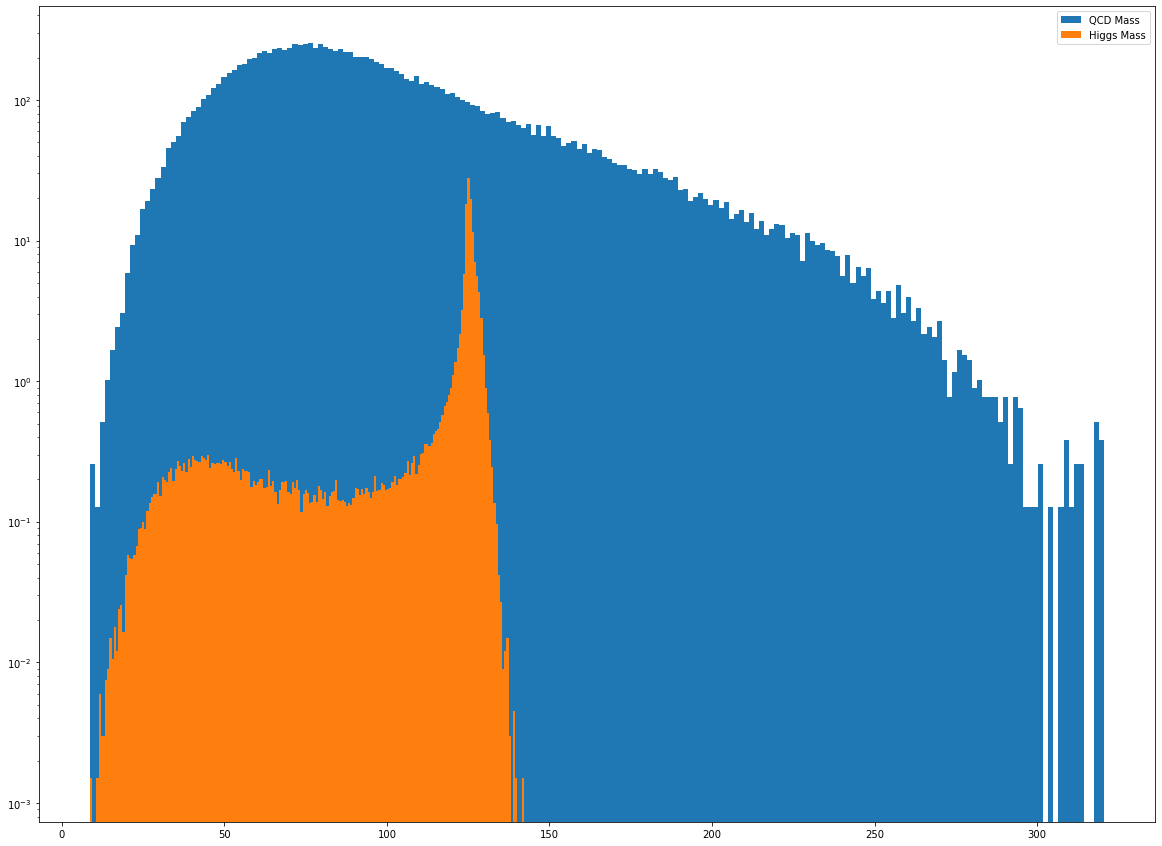

In [78]:
n_bins = 100
n_higgs = 100
n_qcd = 20000

#qcd data 
hist_qcd, bins_q = np.histogram(qMass, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.yscale('log')
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMass, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")
plt.legend()
plt.show()

In [76]:
print(sum(hist_qcd * widths_qcd))
print(sum(hist_higgs * widths_higgs))

20000.000000000025
100.00000000000001


In [89]:
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low5 = stats.poisson.ppf(sigma5, mu=np.mean(qMass))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low5} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5h = stats.poisson.ppf(sigma5, mu=np.mean(hMass))
print(low5, low5h, low5h / low5)
high5 = stats.poisson.ppf(1-sigma5, mu=np.mean(qMass))
high5h = stats.poisson.ppf(1-sigma5, mu=np.mean(hMass))
print(high5, high5h, high5h / high5)

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 53.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
53.0 65.0 1.2264150943396226
151.0 172.0 1.1390728476821192


### Problem 2
- I now want to identify mass cuts to optimize the expected significance

In [79]:
# Cut A: Particles w/ Mass Value greater than 150
hMassA = []
qMassA = []
for i in range(len(hMass)):
    if hMass[i] < 150 and hMass[i] > 100:
        hMassA.append(hMass[i])
    if qMass[i] < 150 and qMass[i] > 100:
        qMassA.append(qMass[i])
len(hMassA), len(qMassA)

(84947, 25905)

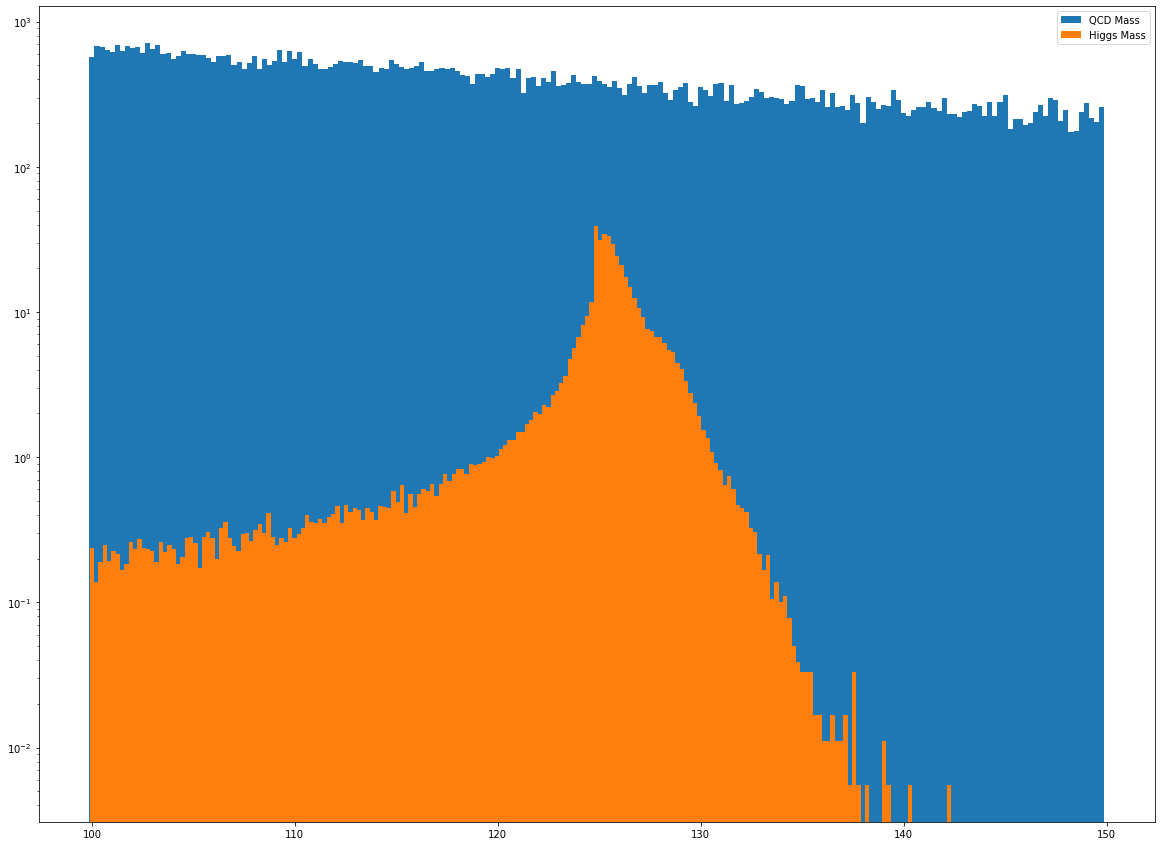

20000.000000000004
99.9999999999999


In [90]:
# Plotting Mass Cut A

#qcd data 
hist_qcd, bins_q = np.histogram(qMassA, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassA, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")
plt.yscale('log')
plt.legend()
plt.show()
print(sum(hist_qcd * widths_qcd))
print(sum(hist_higgs * widths_higgs))

In [92]:
Nhiggs = 100
Nqcd = 20000
Nhiggs / np.sqrt(Nqcd)
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low52 = stats.poisson.ppf(sigma5, mu=np.mean(qMassA))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low52} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5h2 = stats.poisson.ppf(sigma5, mu=np.mean(hMassA))
print(low52, low5h2, low5h2 / low52)

high52 = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassA))
high5h2 = stats.poisson.ppf(1-sigma5, mu=np.mean(hMassA))
print(high52, high5h2, high5h2 / high52)

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 70.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
70.0 73.0 1.042857142857143
179.0 185.0 1.0335195530726258


In [64]:
# Cut B: Only Particles w/ Mass Value around Higgs Mean Mass
hMassB = []
qMassB = []
hMean = np.mean(hMass)
hStd = np.std(hMass)
hMIN = 25
hMAX = 130
for i in range(len(hMass)):
    if hMass[i] < hMAX and hMass[i] > hMIN:
        hMassB.append(hMass[i])
    if qMass[i] < hMAX and qMass[i] > hMIN:
        qMassB.append(qMass[i])
len(hMassB), len(qMassB)

(97334, 80413)

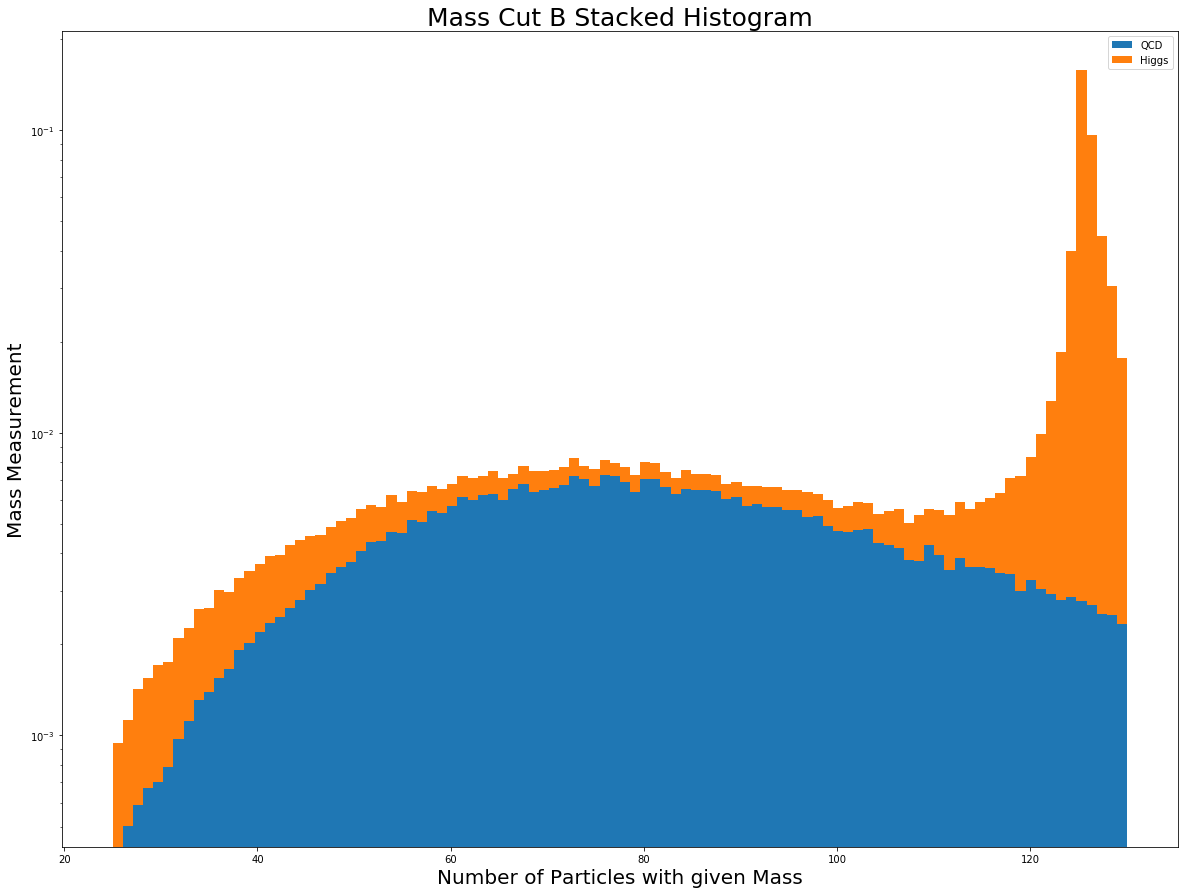

In [65]:
# Plotting Mass Cut B
fig, ax = plt.subplots(1,1)
plt.yscale('log')
n_bins = 100
ax.hist((qMassB, hMassB), bins=n_bins, density=True, histtype='bar', stacked=True, label=('QCD', 'Higgs'))
ax.set_title('Mass Cut B Stacked Histogram',size=25)
ax.set_xlabel('Number of Particles with given Mass', size=20)
ax.set_ylabel('Mass Measurement', size=20)
ax.legend(loc='best')
plt.show()

In [93]:
Nhiggs = 100
Nqcd = 20000
Nhiggs / np.sqrt(Nqcd)
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(f'Probability for finding a 5 sigma detection is a probability of {(sigma5):.3}')

low53 = stats.poisson.ppf(sigma5, mu=np.mean(qMassB))
print(f'The detection value on the x-axis would need to be less than or equal to a mass of {low53} in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background')
low5h3 = stats.poisson.ppf(sigma5, mu=np.mean(hMassB))
print(low53, low5h3, low5h3 / low53)

high53 = stats.poisson.ppf(1-sigma5, mu=np.mean(qMassB))
high5h3 = stats.poisson.ppf(1-sigma5, mu=np.mean(hMassB))
print(high53, high5h3, high5h3 / high53)

Probability for finding a 5 sigma detection is a probability of 2.87e-07
The detection value on the x-axis would need to be less than or equal to a mass of 40.0 in order to be considered a legitimate detection of Higgs Data as opposed to being part of the background
40.0 66.0 1.65
130.0 172.0 1.323076923076923
